In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datapoints.csv")
df.head()

,X,y
0,0.000000,0.496714
1,0.052632,0.019630
2,0.105263,0.963478
3,0.157895,1.996714
4,0.210526,0.397426


In [3]:
df.shape

(20, 2)

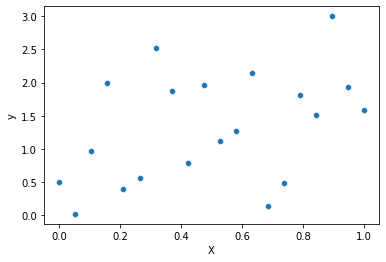

In [5]:
sns.scatterplot(x = df["X"] , y = df.y);

In [6]:
# y = ax + b
# y = 10x
a = 10

y_pred = df["X"] * a
y_pred

0      0.000000
1      0.526316
2      1.052632
3      1.578947
4      2.105263
5      2.631579
6      3.157895
7      3.684211
8      4.210526
9      4.736842
10     5.263158
11     5.789474
12     6.315789
13     6.842105
14     7.368421
15     7.894737
16     8.421053
17     8.947368
18     9.473684
19    10.000000
Name: X, dtype: float64

In [7]:
(sum((y_pred - df.y)**2)) / len(y_pred)

21.30649941907101

In [8]:
lowest_mse = 21
lowest_a = 10

for i in range(1,100,1):
    a = 10 - (i/10)
    y_pred = df["X"] * a
    mse = (sum((y_pred - df.y)**2)) / len(y_pred)
    if mse < lowest_mse :
        lowest_mse = mse
        lowest_a = a

print(lowest_mse)
print(lowest_a)

0.7080422372498428
2.2


In [9]:
# y = 2.2x better than y = 10x

In [11]:
lowest_mse = 21
a = 10
ideal_b = 0

for i in range(1,100,1):
    b = -(i/10)
    y_pred = df["X"] * a + b
    mse = (sum((y_pred - df.y)**2)) / len(y_pred)
    if mse < lowest_mse :
        lowest_mse = mse
        ideal_b = b

print(lowest_mse)
print(ideal_b)

7.82889006440148
-3.7


In [ ]:
# y = 10x - 3.7 better than y = 10x

In [ ]:
# If we use loop in loop it will be the best.

In [13]:
lowest_mse = 21
ideal_a = 10
ideal_b = 0

for i in range(0,200):
    a = 10 - (i/10)
    for k in range(-100,100):
        b = (k/10)
        y_pred = df["X"] * a + b
        mse = (sum((y_pred - df.y)**2)) / len(y_pred)
        if mse < lowest_mse :
            lowest_mse = mse
            ideal_a = a
            ideal_b = b

print(lowest_mse)
print(ideal_a)
print(ideal_b)

0.546419833667009
1.0999999999999996
0.8


In [ ]:
# y = 1.09x + 0.8 most ideal.

In [16]:
def lowest_mse_finder(df):
    X = df["X"]
    y = df["y"]
    lowest_mse = 100
    ideal_a = 0
    ideal_b = 0
    for i in range(-100,100):
        a = i/10
        for k in range(-100,100):
            b = k/10
            y_pred = df["X"] * a + b
            mse = (sum((y_pred - df.y)**2)) / len(y_pred)
            if mse < lowest_mse :
                lowest_mse = mse
                ideal_a = a
                ideal_b = b
    return f"Your ideal a = {ideal_a} , Your ideal b = {ideal_b} , Your lowest mse = {lowest_mse}"

In [17]:
lowest_mse_finder(df)

'Your ideal a = 1.1 , Your ideal b = 0.8 , Your lowest mse = 0.5464198336670092'

In [ ]:
# y = 1.1x + 0.8 is the best.